# Task 1: This is an open ended problem. Apply Exploratory Data Analysis (Univariate and Bivariate) on the dataset available above.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from datetime import datetime
import plotly.figure_factory as ff
from plotly import express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

C:\Users\hp\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\dataset.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
df.shape

(112634, 17)

In [5]:
# Display descriptive statistics for numerical columns
descriptive_stats = df.describe()
print(descriptive_stats)

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08 

In [7]:
# Check for null values in the dataset
null_values = df.isnull().sum()
print(null_values)

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [7]:
# Checking the Missing values
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Univariate Analysis:

In [9]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

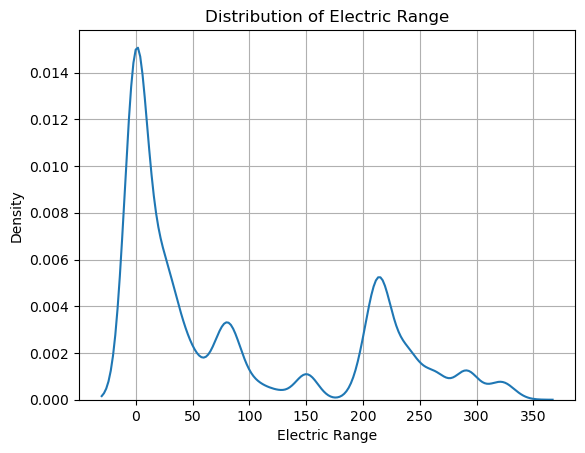

In [13]:
import matplotlib.pyplot as plt
sns.kdeplot(x=df["Electric Range"])
plt.title("Distribution of Electric Range")
plt.grid()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



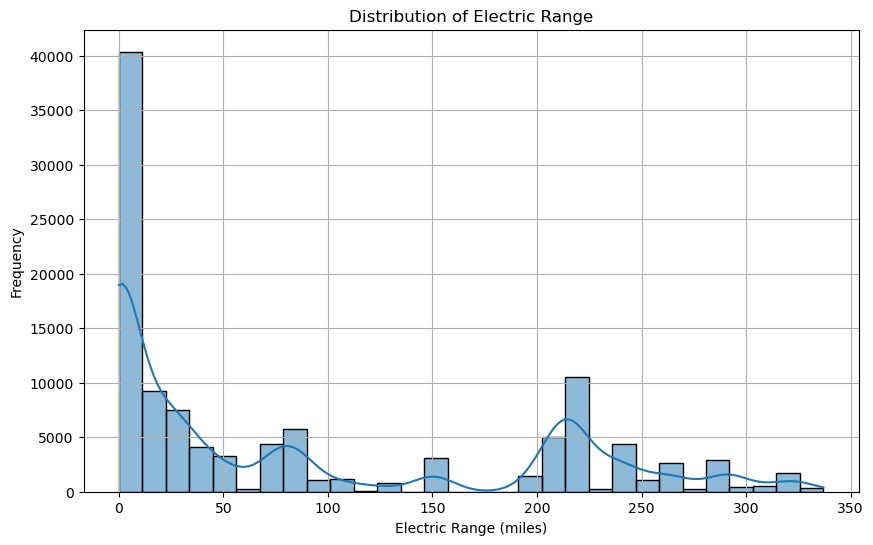

In [10]:
# Plot the distribution of the 'Electric Range' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- The histogram for "Electric Range" shows the distribution of electric vehicle ranges in the dataset, highlighting the most common ranges. Next, let's analyze the distribution of the "Make" variable to see which manufacturers are most represented in the dataset.

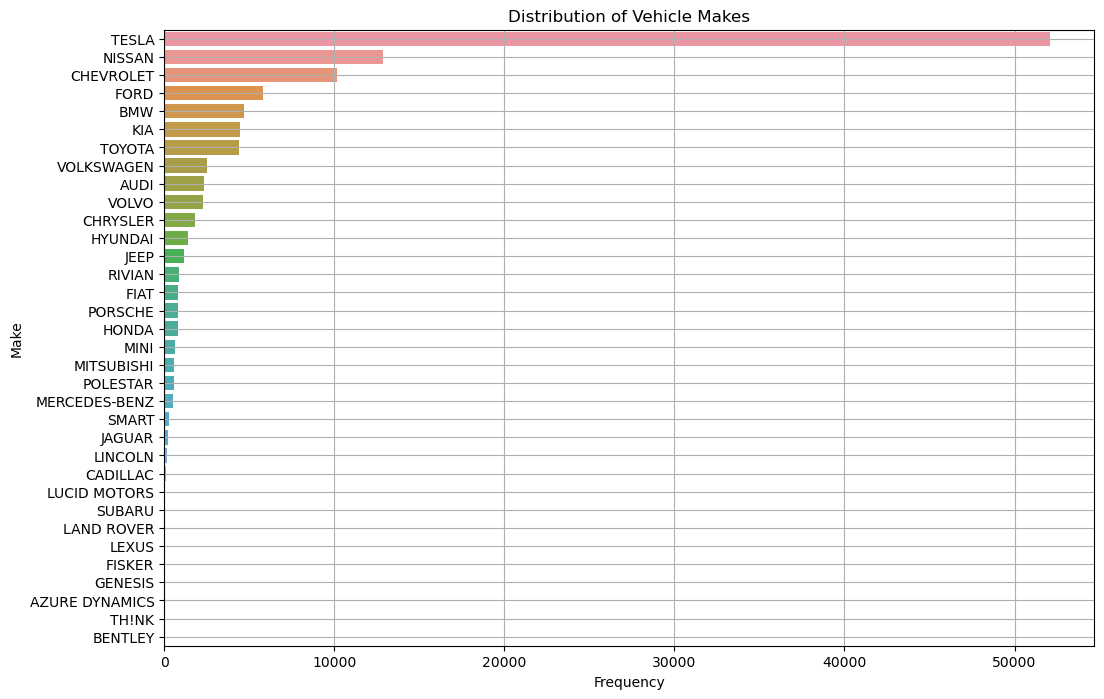

In [11]:
# Plot the distribution of the 'Make' column
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Make'], order=df['Make'].value_counts().index)
plt.title('Distribution of Vehicle Makes')
plt.xlabel('Frequency')
plt.ylabel('Make')
plt.grid(True)
plt.show()

- The univariate analysis has provided insights into the distribution of key variables: "Model Year," "Electric Range," and "Make." The visualizations show trends in vehicle production, common electric ranges, and the most represented manufacturers in the dataset. Next, we can proceed with bivariate analysis to explore relationships between these variables.



# Bivariate Analysis

- For the bivariate analysis, we will explore the relationship between "Model Year" and "Electric Range" to understand how electric vehicle technology has evolved over time. This will help us identify trends in electric vehicle performance improvements. Let's create a scatter plot to visualize this relationship

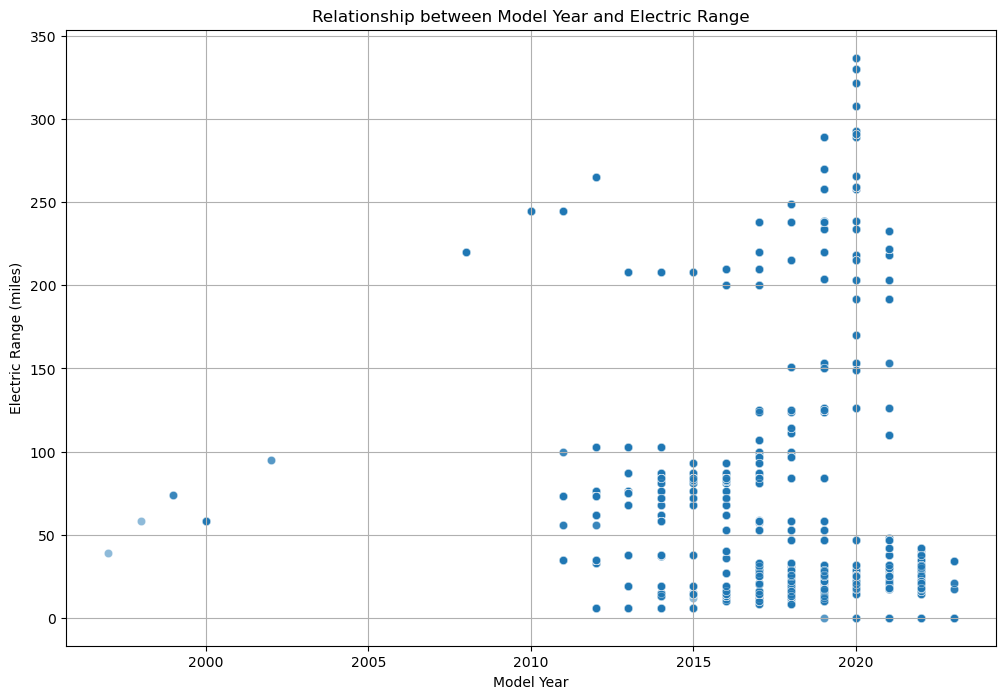

In [12]:
import os
# Scatter plot to explore the relationship between 'Model Year' and 'Electric Range'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Model Year', y='Electric Range', alpha=0.5)
plt.title('Relationship between Model Year and Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.show()

- This scatter plot shows the relationship between Model Year and Electric Range. We can observe a general trend of increasing electric range as the model year progresses, with more recent years showing a wider spread of ranges.

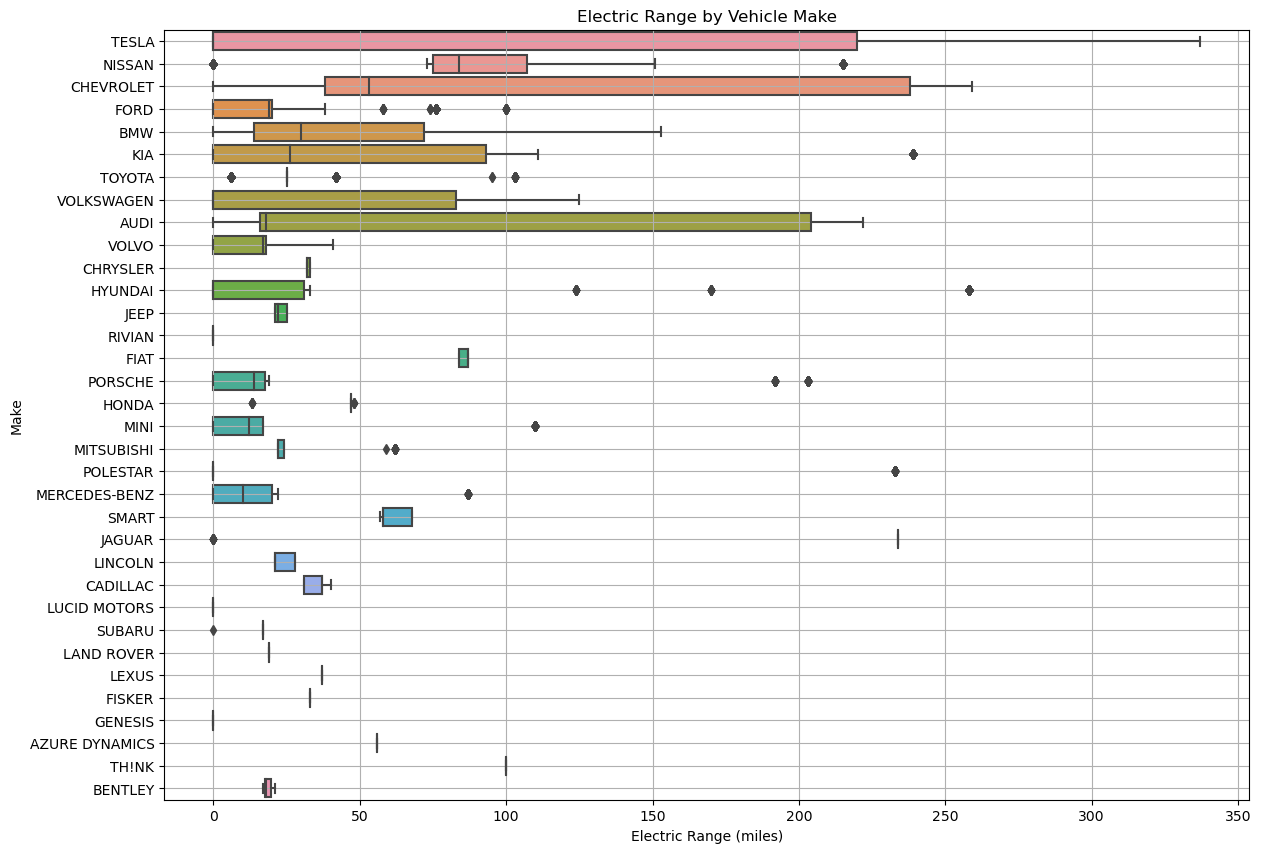

In [13]:
# Box plot to explore the relationship between 'Make' and 'Electric Range'
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, x='Electric Range', y='Make', order=df['Make'].value_counts().index)
plt.title('Electric Range by Vehicle Make')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Make')
plt.grid(True)
plt.show()

- The box plot above illustrates the distribution of electric ranges across different vehicle makes, highlighting variations in performance among manufacturers. This visualization helps identify which manufacturers tend to produce vehicles with higher or lower electric ranges.

# Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.


In [14]:
import plotly.express as px

# Group by County and count the number of EVs
ev_count_by_county = df['County'].value_counts().reset_index()
ev_count_by_county.columns = ['County', 'EV_Count']

# Create the Choropleth map
fig = px.choropleth(ev_count_by_county, 
                    locations='County', 
                    locationmode="geojson-id", 
                    color='EV_Count',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Number of Electric Vehicles by County in Washington State")

# Adjust the map view to focus on Washington State
fig.update_geos(center=dict(lat=47.7511, lon=-120.7401), 
                projection_scale=5)

# Save the figure as an HTML file
fig.write_html("washington_ev_choropleth.html")
print("Choropleth map has been saved as 'washington_ev_choropleth.html'")

# Display the top 10 counties by EV count
print(ev_count_by_county.head(10))

Choropleth map has been saved as 'washington_ev_choropleth.html'
      County  EV_Count
0       King     59000
1  Snohomish     12434
2     Pierce      8535
3      Clark      6689
4   Thurston      4126
5     Kitsap      3847
6    Whatcom      2840
7    Spokane      2792
8     Benton      1376
9     Island      1307


In [14]:
state_data = df.groupby('State')['VIN (1-10)'].count().reset_index()
state_data.columns = ['State', 'EV Count']

fig = px.choropleth(state_data, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='EV Count', 
                    color_continuous_scale='greens', 
                    scope='usa',
                    labels={'EV Count': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles by State')

fig.show()

# Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.



In [15]:
ev_make_by_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')

# Step 2: Create a list of all unique makes
unique_makes = df['Make'].unique()

# Step 3: Ensure all makes appear in every year by filling missing combinations
all_years = pd.DataFrame({'Model Year': sorted(df['Model Year'].unique())})
all_combinations = all_years.assign(key=1).merge(pd.DataFrame({'Make': unique_makes, 'key':1}), on='key').drop('key', axis=1)
ev_make_by_year_full = all_combinations.merge(ev_make_by_year, on=['Model Year', 'Make'], how='left').fillna(0)

# Step 4: Convert EV Count to integer (since it was NaN before)
ev_make_by_year_full['EV Count'] = ev_make_by_year_full['EV Count'].astype(int)

# Step 5: Create the animated racing bar plot with increased height
fig = px.bar(
    ev_make_by_year_full,  # Data
    x='EV Count',  # X-axis shows the count of EVs
    y='Make',  # Y-axis shows the car Make
    color='Make',  # Color by car Make
    animation_frame='Model Year',  # Animation by year
    orientation='h',  # Horizontal bar chart
    title='Electric Vehicle Makes Over the Years',
    labels={'EV Count':'Number of EVs', 'Make':'Car Make'},  # Axis labels
    range_x=[0, ev_make_by_year_full['EV Count'].max() * 1.1],  # Dynamically set x-axis range
    height=800  # Increased height for better visibility
)
fig.show()